Notebook with smaller functions used throughout the project

In [ ]:
import os
import shutil

Copy folder structure without the files.

In [ ]:
source_folder = 'simulations'
destination_folder = 'simulations_cut'

In [ ]:
def copy_empty_folder_structure(source_folder, destination_folder):
    for root, dirs, _ in os.walk(source_folder):
        for dir_name in dirs:
            source_dir = os.path.join(root, dir_name)
            relative_dir = os.path.relpath(source_dir, source_folder)
            destination_dir = os.path.join(destination_folder, relative_dir)

            if not os.path.exists(destination_dir):
                os.makedirs(destination_dir)

In [ ]:
if os.path.exists(source_folder):
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)
        
    copy_empty_folder_structure(source_folder, destination_folder)
    print("Empty folder structure copied successfully.")
else:
    print("Source folder does not exist.")

Cut frames and use only one lap of a simulation file.

In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
def copy_and_modify_csv(source_csv, destination_csv):
    print(source_csv)
    df = pd.read_csv(source_csv)
    # Filter rows for the first lap and skip the first 100 rows
    df = df[(df['Lap Number'] == 1) & (df.index >= 100)]

    # Reset the index and adjust the frameId
    df.reset_index(drop=True, inplace=True)
    df['frameId'] = np.arange(len(df))

    # Save the modified DataFrame to a new CSV file
    df.to_csv(destination_csv, index=False)

def process_folders(root_folder):
    for root, dirs, _ in os.walk(root_folder):
        for dir_name in dirs:
            source_csv = os.path.join(root, dir_name, "driving_log.csv")
            if os.path.exists(source_csv):
                destination_csv = os.path.join(root, dir_name, "driving_log_cut.csv")
                copy_and_modify_csv(source_csv, destination_csv)

In [ ]:
main_folder = "simulations"
process_folders(main_folder)

In [ ]:
data_df_nominal = pd.read_csv(r'simulations\DAVE2-Track1-Normal\driving_log.csv')
# Filter rows for the first lap and skip the first 100 rows
data_df_nominal = data_df_nominal[(data_df_nominal['Lap Number'] == 1) & (data_df_nominal.index >= 100)]
# Reset the index and adjust the frameId
data_df_nominal.reset_index(drop=True, inplace=True)
data_df_nominal['frameId'] = np.arange(len(data_df_nominal))

In [ ]:
data_df_nominal

In [ ]:
original_losses = pd.read_csv(r'plots\uncertainty\MC\DAVE2-Track1-Normal\dave2-p10-track1-mcd_10_S128.csv')
original_losses = original_losses[100:len(data_df_nominal)+100]
data_df_nominal.isna

Functions for converting results files into ICST tables

In [ ]:
import pandas as pd

In [ ]:
path = 'results/final_'+str(t)
path

In [ ]:
t=99

In [ ]:
m1 = pd.read_csv(f'results/final_{t}/dave2-p10-track1-mcd_5_S32.csv')
m2 = pd.read_csv(f'results/final_{t}/dave2-p10-track1-mcd_5_S128.csv')
m3 = pd.read_csv(f'results/final_{t}/dave2-p10-track1-mcd_30_S64.csv')
m4 = pd.read_csv(f'results/final_{t}/dave2-p10-track1-mcd_30_S128.csv')

In [ ]:
d3 = pd.read_csv(f'results/final_{t}/dave2-track1-DE_3.csv')
d5 = pd.read_csv(f'results/final_{t}/dave2-track1-DE_5.csv')
d10 = pd.read_csv(f'results/final_{t}/dave2-track1-DE_10.csv')
d50 = pd.read_csv(f'results/final_{t}/dave2-track1-DE_50.csv')
d120 = pd.read_csv(f'results/final_{t}/dave2-track1-DE_120.csv')

In [ ]:
t=99999
m = pd.read_csv(f'results/final_{t}/dave2-track1-DE_50.csv')
df = m[m['simulation_name'].str.contains('xai-track1-fog', case=False)]
df = df[['model','simulation_name', 'precision', 'recall', 'f3']]
df.to_csv(f'results/temp/fog_{t}.csv')

df = m[m['simulation_name'].str.contains('xai-track1-rain', case=False)]
df = df[['model','simulation_name', 'precision', 'recall', 'f3']]
df.to_csv(f'results/temp/rain_{t}.csv')

df = m[m['simulation_name'].str.contains('xai-track1-snow', case=False)]
df = df[['model','simulation_name', 'precision', 'recall', 'f3']]
df.to_csv(f'results/temp/snow_{t}.csv')

df = m[m['simulation_name'].str.contains('udacity', case=False)]
df = df[['model','simulation_name', 'precision', 'recall', 'f3']]
df.to_csv(f'results/temp/mutants_{t}.csv')

df = m[m['simulation_name'].str.contains('DAVE2-Track1', case=False)]
df = df[['model','simulation_name', 'precision', 'recall', 'f3']]
df.to_csv(f'results/temp/icse20_{t}.csv')

Plotting f3 scores

In [2]:
import pandas as pd
df = pd.read_csv('result_tables/f3 plots_dynamic.csv',sep=';')
df

,Unnamed: 0,MCD-5 S32,MCD-5 S64,MCD-5 S128,DE5,DE10,DE50,SelfOracle,ThirdEye
0,"0,95",71,70,70,75,73,74,64,66
1,"0,99",76,73,74,86,83,91,75,65
2,"0,999",75,70,68,90,92,94,64,45
3,"0,9999",69,61,61,89,89,94,51,32
4,"0,99999",60,52,52,86,91,93,40,19


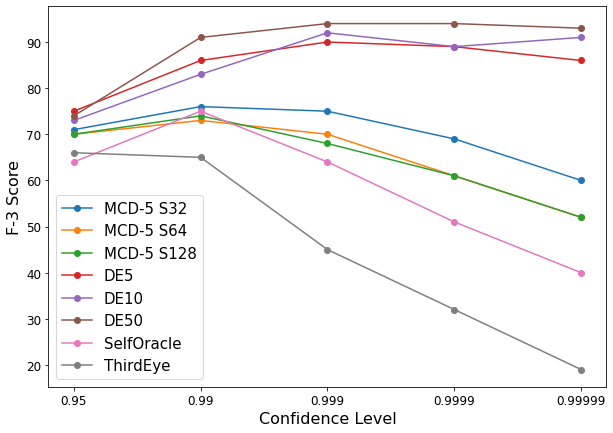

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Ensure that the DataFrame contains the necessary data

#models = ['SelfOracle', 'ThirdEye', 'MCD-5 S64', 'MCD-5 S128', 'DE3', 'DE5']
models = ['MCD-5 S32','MCD-5 S64', 'MCD-5 S128', 'DE5', 'DE10', 'DE50','SelfOracle', 'ThirdEye']

# Extracting data for plotting
confidence_levels = df['Unnamed: 0']
model_scores = [df[model] for model in models]

# Plotting the data
plt.figure(figsize=(10,7))
for i, scores in enumerate(model_scores):
    plt.plot(confidence_levels, scores, marker='o', label=f'{models[i]}')

# Setting the x and y labels
plt.xlabel('Confidence Level',fontsize=16)
plt.ylabel('F-3 Score',fontsize=16)

# Setting the title
#plt.title('F-3 Scores of Different Models at Various Confidence Levels',fontsize=18)

# Setting the x-axis ticks
plt.yticks(fontsize=12)

plt.xticks(confidence_levels,['0.95','0.99','0.999','0.9999','0.99999'],fontsize=12)

# Showing the legend
plt.legend(fontsize=15)

# Displaying the plot
plt.show()

Calculate Number of models and images used

In [1]:
import os

def count_png_files(folder_path):
    count = 0
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".jpg"):
                count += 1
    return count

def list_subfolders_with_counts(folder_path):
    subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]
    result = {}
    for subfolder in subfolders:
        result[subfolder] = count_png_files(subfolder)
    return result

In [2]:
folder_path = r"simulations/"  
subfolders_with_counts = list_subfolders_with_counts(folder_path)

print("Subfolders and their respective counts:")
for folder, count in subfolders_with_counts.items():
    print(f"{folder}: {count} .png files")

Subfolders and their respective counts:
simulations/benchmark-ASE2022: 336036 .png files
simulations/DAVE2-Track1-Normal: 12132 .png files
simulations/gauss-journal-track1-nominal: 6687 .png files
simulations/icse20: 114016 .png files
simulations/icse20-ood: 6687 .png files
simulations/icse20_1: 57008 .png files
simulations/icse20_rest: 2054 .png files
simulations/mutants: 315078 .png files
simulations/mutants_1: 102797 .png files
simulations/ood: 212716 .png files
simulations/xai-track1-fog-10: 6622 .png files
simulations/xai-track1-fog-100: 10530 .png files
simulations/xai-track1-fog-20: 9420 .png files
simulations/xai-track1-fog-30: 4069 .png files
simulations/xai-track1-fog-40: 14434 .png files
simulations/xai-track1-fog-50: 8230 .png files
simulations/xai-track1-fog-60: 6732 .png files
simulations/xai-track1-fog-70: 8774 .png files
simulations/xai-track1-fog-80: 6786 .png files
simulations/xai-track1-fog-90: 6780 .png files
simulations/xai-track1-rain-10: 6430 .png files
simulatio

In [3]:
import os
import pandas as pd

def sum_images(folder_path):
    total_rows = 0
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".jpg"):
                file_path = os.path.join(root, file)
                df = pd.read_csv(file_path)
                total_rows += len(df)
    return total_rows

In [4]:
import os
import pandas as pd

def sum_csv_rows(folder_path):
    total_rows = 0
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".csv"):
                file_path = os.path.join(root, file)
                df = pd.read_csv(file_path)
                total_rows += len(df)
    return total_rows

In [5]:
folder_path = r"simulations/mutants" 
total_rows = sum_csv_rows(folder_path)
print(f"The sum of rows of all .csv files is: {total_rows}")

The sum of rows of all .csv files is: 315084


ICST Results Table

In [8]:
import os

# Set the path to icst folder
folder_path = r'results\dynamic\t99'

# List all files in the directory
files = os.listdir(folder_path)

# Rename files by removing 'dave2-p10-track1-' or 'dave2-track1-' from the file names
for file in files:
    if file.endswith('.csv'):
        new_name = file.replace('dave2-p10-track1-', '').replace('dave2-track1-', '')
        os.rename(os.path.join(folder_path, file), os.path.join(folder_path, new_name))


In [ ]:
import os
import pandas as pd

# Set the path to the main folder
main_folder_path = 'results/icse35_dynamic/'

# List of model names
models = ['dave2-p10-track1-mcd_5_S32', 'dave2-p10-track1-mcd_5_S64', 'dave2-p10-track1-mcd_5_S128', 'dave2-track1-DE_5', 'dave2-track1-DE_10', 'dave2-track1-DE_50', 'SelfOracle', 'ThirdEye']
# List of subfolder names
subfolders = ['t95', 't99', 't999', 't9999', 't99999']

# Iterate through each model
for model in models:
    dfs = []
    for folder in subfolders:
        file_path = os.path.join(main_folder_path, folder, f"{model}.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            df = df[['simulation_name', 'ttm', 'precision', 'recall', 'f3']]
            df.columns = [f'{col}_{folder}' for col in df.columns]  # Rename columns based on threshold
            dfs.append(df)
    if dfs:
        merged_df = pd.concat(dfs, axis=1)
        merged_df.rename(columns={'simulation_name_t95': 'name', 'ttm_t95': 'seconds'}, inplace=True)  # Using inplace=True to modify the DataFrame in place
        merged_df = merged_df.loc[:,~merged_df.columns.str.contains('ttm|simulation_name')]  # Remove columns containing 'ttm' or 'simulation_name'
        merged_df.to_csv(f"results/temp/{model}_merged_data.csv", index=False)


In [ ]:
import pandas as pd

# Read the CSV files
df1 = pd.read_csv('results/temp/dave2-p10-track1-mcd_5_S32_merged_data.csv')
df2 = pd.read_csv('results/temp/dave2-p10-track1-mcd_5_S64_merged_data.csv')
df3 = pd.read_csv('results/temp/dave2-p10-track1-mcd_5_S128_merged_data.csv')

#DE

#df1 = pd.read_csv('results/temp/dave2-track1-DE_5_merged_data.csv')
#df2 = pd.read_csv('results/temp/dave2-track1-DE_10_merged_data.csv')
#df3 = pd.read_csv('results/temp/dave2-track1-DE_50_merged_data.csv')

# Remove specific columns from df2 and df3
df2 = df2.drop(['name', 'seconds'], axis=1)
df3 = df3.drop(['name', 'seconds'], axis=1)

# Rename columns to avoid duplication
df2 = df2.add_suffix('_2')
df3 = df3.add_suffix('_3')

# Merge the dataframes
merged_df = pd.concat([df1, df2, df3], axis=1)

# Save the merged dataframe to a new CSV file
merged_df.to_csv('merged_files.csv', index=False)

In [ ]:
m=pd.read_csv(r'merged_files.csv')

In [ ]:
m
df = m[m['name'].str.contains('xai-track1-fog', case=False)]
df.to_csv(f'results/temp/fog.csv')

df = m[m['name'].str.contains('xai-track1-rain', case=False)]
df.to_csv(f'results/temp/rain.csv')

df = m[m['name'].str.contains('xai-track1-snow', case=False)]
df.to_csv(f'results/temp/snow.csv')

df = m[m['name'].str.contains('udacity', case=False)]
df.to_csv(f'results/temp/mutants.csv')

df = m[m['name'].str.contains('DAVE2-Track1', case=False)]
df.to_csv(f'results/temp/icse20.csv')

<!-- add time to icse20 dataset -->

Add Time to csv files

In [ ]:
import pandas as pd
import re

path = 'simulations/icse20/DAVE2-Track1-Snow/driving_log.csv'
df = pd.read_csv(path)

# Extracting the time segment
df['time_segment'] = df['center'].str.extract(r'(\d{4}_\d{2}_\d{2}_\d{2}_\d{2}_\d{2}_\d{3})')

# Converting the time segment to datetime objects
df['time_segment'] = pd.to_datetime(df['time_segment'], format='%Y_%m_%d_%H_%M_%S_%f')

# Calculating the time difference in seconds from the first row as an integer
df['time'] = (df['time_segment'] - df['time_segment'].iloc[0]).dt.total_seconds().astype(int)


# Display the DataFrame with the new column
df.to_csv(path)

calculate average fps

In [ ]:
import glob
import os
from natsort import natsorted
import pandas as pd
import numpy as np

fps=[]
for condition in [ 'icse20','mutants', 'ood']:
    simulations = natsorted(glob.glob('simulations/' + condition + '/*'))
    for sim in simulations:
        path = os.path.join(sim,'driving_log.csv')
        df=pd.read_csv(path)
        number_frames_nominal = pd.Series.max(df['frameId'])
        simulation_time_nominal = pd.Series.max(df['time'])
        fps_nominal = number_frames_nominal // simulation_time_nominal
        fps.append(fps_nominal)
        print(fps_nominal)
        


In [ ]:
np.mean(fps)

Plotting profiling (memory and time)

In [106]:
import os
import re
import pandas as pd

folder_path = 'performance testing'

# Initialize an empty list to store dataframes
dataframes = []

# Function to parse the .dat file and extract relevant information
def parse_dat_file(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
        model_name = os.path.basename(file_path).replace('.dat', '')
        memory_values = []
        timestamps = []
        for line in lines:
            if line.startswith("MEM"):
                parts = re.split(r'\s+', line)
                memory_values.append(float(parts[1]))
                timestamps.append(float(parts[2]))

        max_memory = max(memory_values)
        total_time = max(timestamps) - min(timestamps)

        return pd.DataFrame([[model_name, max_memory, total_time]], columns=['Name', 'Max Memory Usage', 'Total Time'])

# Loop through each file in the directory
for file in os.listdir(folder_path):
    if file.endswith('.dat'):
        file_path = os.path.join(folder_path, file)
        summary_df = parse_dat_file(file_path)
        dataframes.append(summary_df)

# Concatenate all dataframes into one
result_df = pd.concat(dataframes, ignore_index=True)

# Print the final dataframe
result_df

,Name,Max Memory Usage,Total Time
0,DE0,946.441406,9.5706
1,DE1,1072.968750,13.4776
2,DE10,1125.878906,46.8715
3,DE120,1790.054688,452.8923
4,DE5,978.230469,27.5707
5,DE50,1309.945312,195.4237
6,MCD_S10,334.339844,116.8842
7,MCD_S128,444.863281,736.5215
8,MCD_S2,324.457031,53.1174
9,MCD_S32,355.082031,245.0981


In [107]:
models = ['MCD_S32', 'MCD_S64', 'MCD_S128', 'DE5', 'DE10','DE50'] 
new_df = result_df[result_df['Name'].isin(models)]

In [47]:
new_df

,Name,Max Memory Usage,Total Time
2,DE10,1125.878906,46.8715
4,DE5,978.230469,27.5707
5,DE50,1309.945312,195.4237
7,MCD_S128,444.863281,736.5215
9,MCD_S32,355.082031,245.0981
11,MCD_S64,383.792969,412.7604
13,SelfOracle_no_cache,26354.742188,141.1451
14,ThirdEye,1130.953125,15.2158


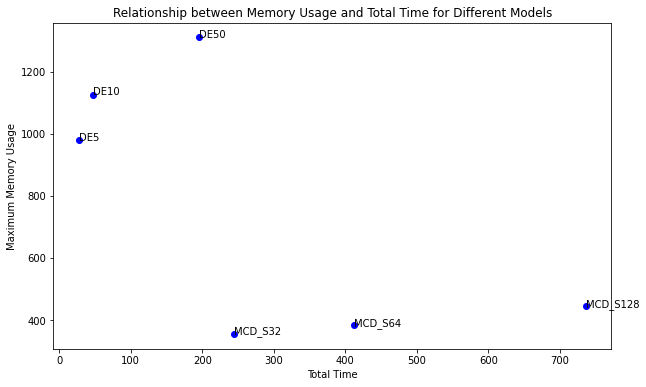

In [108]:
import matplotlib.pyplot as plt

# Scatter plot of maximum memory usage and total time for each model
plt.figure(figsize=(10, 6))
plt.scatter(new_df['Total Time'], new_df['Max Memory Usage'], color='b', marker='o')

# Add model names as labels to the points
for i, txt in enumerate(new_df['Name']):
    plt.annotate(txt, (new_df['Total Time'].iloc[i], new_df['Max Memory Usage'].iloc[i]))

# Set labels and title
plt.xlabel('Total Time')
plt.ylabel('Maximum Memory Usage')
plt.title('Relationship between Memory Usage and Total Time for Different Models')
plt.show()


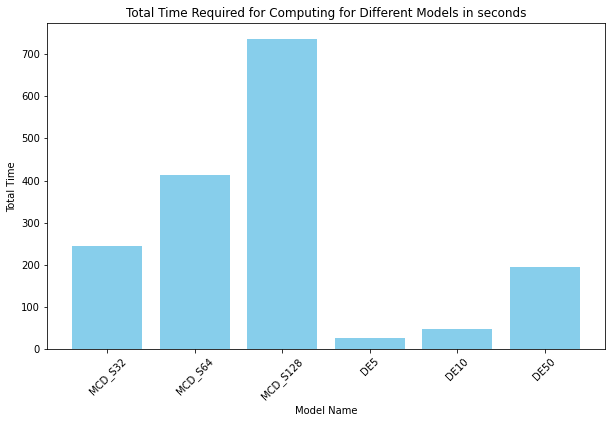

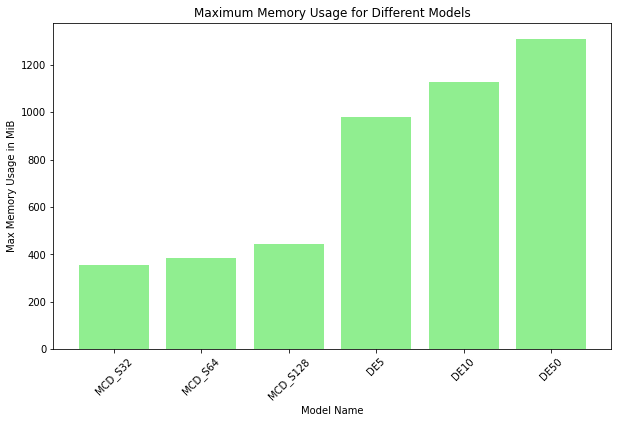

In [109]:
import matplotlib.pyplot as plt

# Reorder the DataFrame based on the custom order
new_df = new_df.set_index('Name').reindex(models).reset_index()

# Plot for runtime
plt.figure(figsize=(10, 6))
plt.bar(new_df['Name'], new_df['Total Time'], color='skyblue')
plt.xlabel('Model Name')
plt.ylabel('Total Time')
plt.title('Total Time Required for Computing for Different Models in seconds')
plt.xticks(rotation=45)
plt.show()

# Plot for memory usage
plt.figure(figsize=(10, 6))
plt.bar(new_df['Name'], new_df['Max Memory Usage'], color='lightgreen')
plt.xlabel('Model Name')
plt.ylabel('Max Memory Usage in MiB')
plt.title('Maximum Memory Usage for Different Models')
plt.xticks(rotation=45)
plt.show()

In [110]:
models = ['MCD_S32', 'MCD_S64', 'MCD_S128', 'DE5', 'DE10','DE50','SelfOracle','ThirdEye'] 
df = result_df[result_df['Name'].isin(models)]
df = df.set_index('Name').reindex(models).reset_index()

In [112]:
# 'Total Images' is 11031 for all models

# Add the 'Total Images' column
df['Total Images'] = 11031

# Calculate IPS
df['Iterations per Second'] = df['Total Images'] / df['Total Time']
#Seconds per iteration
df['Seconds per Iteration'] = df['Total Time'] / df['Total Images']
# Convert seconds to milliseconds for each iteration
df['Milliseconds per Iteration'] = df['Seconds per Iteration'] * 1000

# Print the updated DataFrame
df

,Name,Max Memory Usage,Total Time,Total Images,Iterations per Second,Seconds per Iteration,Milliseconds per Iteration
0,MCD_S32,355.082031,245.0981,11031,45.006469,0.022219,22.219028
1,MCD_S64,383.792969,412.7604,11031,26.724947,0.037418,37.418221
2,MCD_S128,444.863281,736.5215,11031,14.977160,0.066768,66.768335
3,DE5,978.230469,27.5707,11031,400.098653,0.002499,2.499384
4,DE10,1125.878906,46.8715,11031,235.345572,0.004249,4.249071
5,DE50,1309.945312,195.4237,11031,56.446582,0.017716,17.715864
6,SelfOracle,26354.742188,141.1451,11031,78.153616,0.012795,12.795313
7,ThirdEye,6991.226562,2903.7579,11031,3.798870,0.263236,263.236144


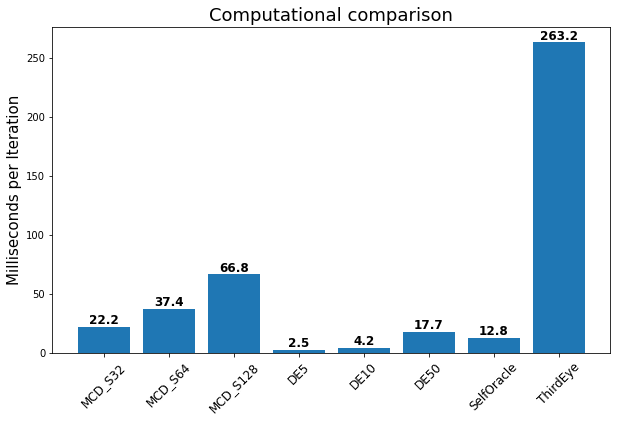

In [125]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(df['Name'], df['Milliseconds per Iteration'], color='tab:blue')
plt.ylabel('Milliseconds per Iteration', fontsize=15)
plt.title('Computational comparison', fontsize=18)
plt.xticks(rotation=45, fontsize=12)

# Adding value labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval,1), va='bottom', ha='center', fontsize=12, weight='bold')

plt.show()
